In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv("/content/gdrive/My Drive/ElectronicVehicle_Segmentation/Electric Car Data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             102 non-null    object 
 1   Model             102 non-null    object 
 2   Accelsec          102 non-null    float64
 3   TopSpeed_KmH      102 non-null    int64  
 4   Range_Km          102 non-null    int64  
 5   Battery_Pack Kwh  102 non-null    float64
 6   Efficiency_WhKm   102 non-null    int64  
 7   FastCharge_KmH    102 non-null    int64  
 8   RapidCharge       102 non-null    object 
 9   PowerTrain        102 non-null    object 
 10  Plug Type         102 non-null    object 
 11  Body Style        102 non-null    object 
 12  Segment           102 non-null    object 
 13  Seats             102 non-null    int64  
 14  Price Euro        102 non-null    int64  
 15  INR               102 non-null    float64
dtypes: float64(3), int64(6), object(7)
memory us

In [ ]:
df.describe()

,Accelsec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,Seats,Price Euro,INR
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,1.020000e+02
mean,7.391176,179.313725,338.627451,65.415686,189.303922,435.686275,4.882353,55997.588235,4.583352e+06
std,3.031913,43.771228,126.700623,29.955782,29.679072,220.447384,0.799680,34250.724403,2.803391e+06
min,2.100000,123.000000,95.000000,16.700000,104.000000,0.000000,2.000000,20129.000000,1.647541e+06
25%,5.100000,150.000000,250.000000,43.125000,168.000000,260.000000,5.000000,34414.750000,2.816816e+06
50%,7.300000,160.000000,340.000000,64.350000,180.500000,440.000000,5.000000,45000.000000,3.683210e+06
75%,9.000000,200.000000,400.000000,83.700000,204.500000,557.500000,5.000000,65000.000000,5.320192e+06
max,22.400000,410.000000,970.000000,200.000000,273.000000,940.000000,7.000000,215000.000000,1.759756e+07


**Finding out null values**

In [ ]:
df.isnull().sum()

Brand               0
Model               0
Accelsec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
Plug Type           0
Body Style          0
Segment             0
Seats               0
Price Euro          0
INR                 0
dtype: int64

In [ ]:
df['inr(10e3)'] = df['Price Euro']*0.08320
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
df.head()

,Brand,Model,Accelsec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,Plug Type,Body Style,Segment,Seats,Price Euro,INR,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4540988.068,4615.9360
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,1,RWD,Type 2 CCS,Hatchback,C,5,30000,2455473.000,2496.0000
2,Polestar,2,4.7,210,400,75.0,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4619563.204,4695.8080
3,BMW,iX3,6.8,180,360,74.0,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5569012.764,5660.9280
4,Honda,e,9.5,145,170,28.5,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2700774.753,2745.3504


In [ ]:
df[(df['Brand'] == 'Tesla ') | (df['Brand'] == 'BMW ')]

,Brand,Model,Accelsec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,Plug Type,Body Style,Segment,Seats,Price Euro,INR,inr(10e3)


In [ ]:
a=np.arange(1,104)

**Frequency of brands in dataset**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'Polestar'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Lucid'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Audi'),
  Text(8, 0, 'Mercedes'),
  Text(9, 0, 'Nissan'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Porsche'),
  Text(12, 0, 'MG'),
  Text(13, 0, 'Mini'),
  Text(14, 0, 'Opel'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Volvo'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Renault'),
  Text(19, 0, 'Mazda'),
  Text(20, 0, 'Lexus'),
  Text(21, 0, 'CUPRA'),
  Text(22, 0, 'SEAT'),
  Text(23, 0, 'Lightyear'),
  Text(24, 0, 'Aiways'),
  Text(25, 0, 'DS'),
  Text(26, 0, 'Citroen'),
  Text(27, 0, 'Jaguar'),
  Text(28, 0, 'Ford'),
  Text(29, 0, 'Byton'),
  Text(30, 0, 'Sono'),
  Text(31, 0, 'Smart'),
  Text(32, 0, 'Fiat')])

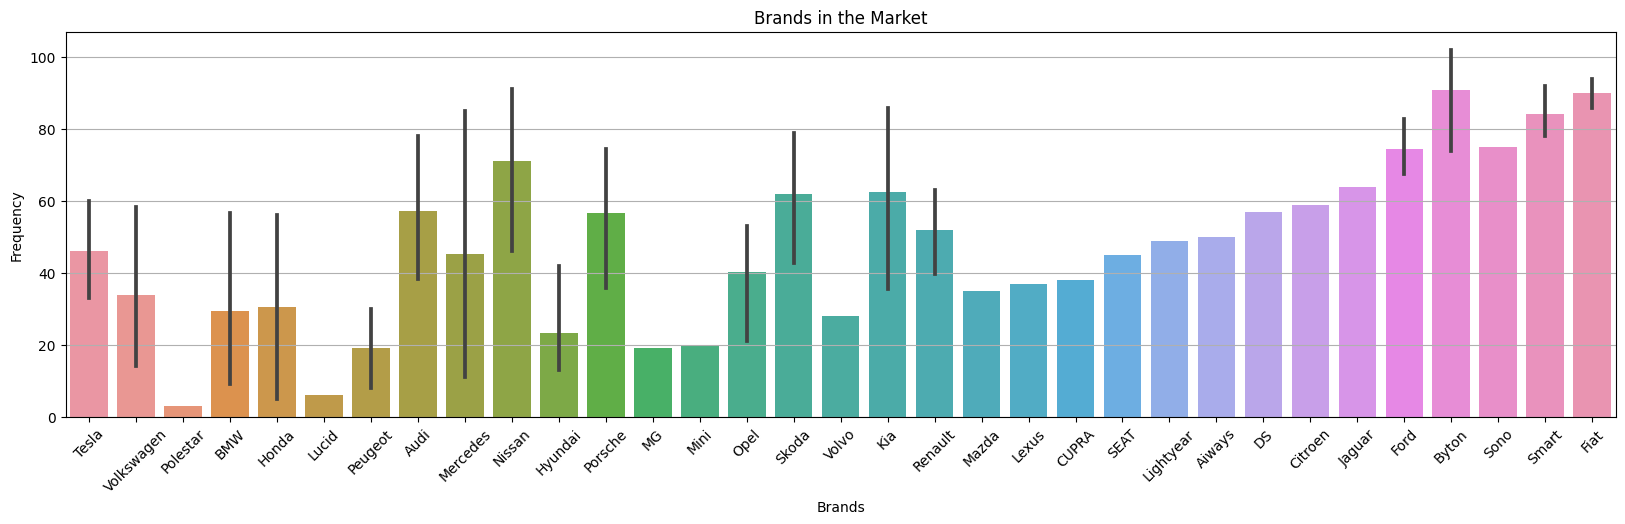

In [ ]:
a=np.arange(1,103)
ax = plt.figure(figsize = (20,5))
sn.barplot(x = 'Brand', y = a, data = df)
plt.grid(axis = 'y')
plt.title('Brands in the Market')
plt.xlabel('Brands')

plt.ylabel('Frequency')
plt.xticks(rotation = 45)

**Top speed achieved by car**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'Polestar'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Lucid'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Audi'),
  Text(8, 0, 'Mercedes'),
  Text(9, 0, 'Nissan'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Porsche'),
  Text(12, 0, 'MG'),
  Text(13, 0, 'Mini'),
  Text(14, 0, 'Opel'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Volvo'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Renault'),
  Text(19, 0, 'Mazda'),
  Text(20, 0, 'Lexus'),
  Text(21, 0, 'CUPRA'),
  Text(22, 0, 'SEAT'),
  Text(23, 0, 'Lightyear'),
  Text(24, 0, 'Aiways'),
  Text(25, 0, 'DS'),
  Text(26, 0, 'Citroen'),
  Text(27, 0, 'Jaguar'),
  Text(28, 0, 'Ford'),
  Text(29, 0, 'Byton'),
  Text(30, 0, 'Sono'),
  Text(31, 0, 'Smart'),
  Text(32, 0, 'Fiat')])

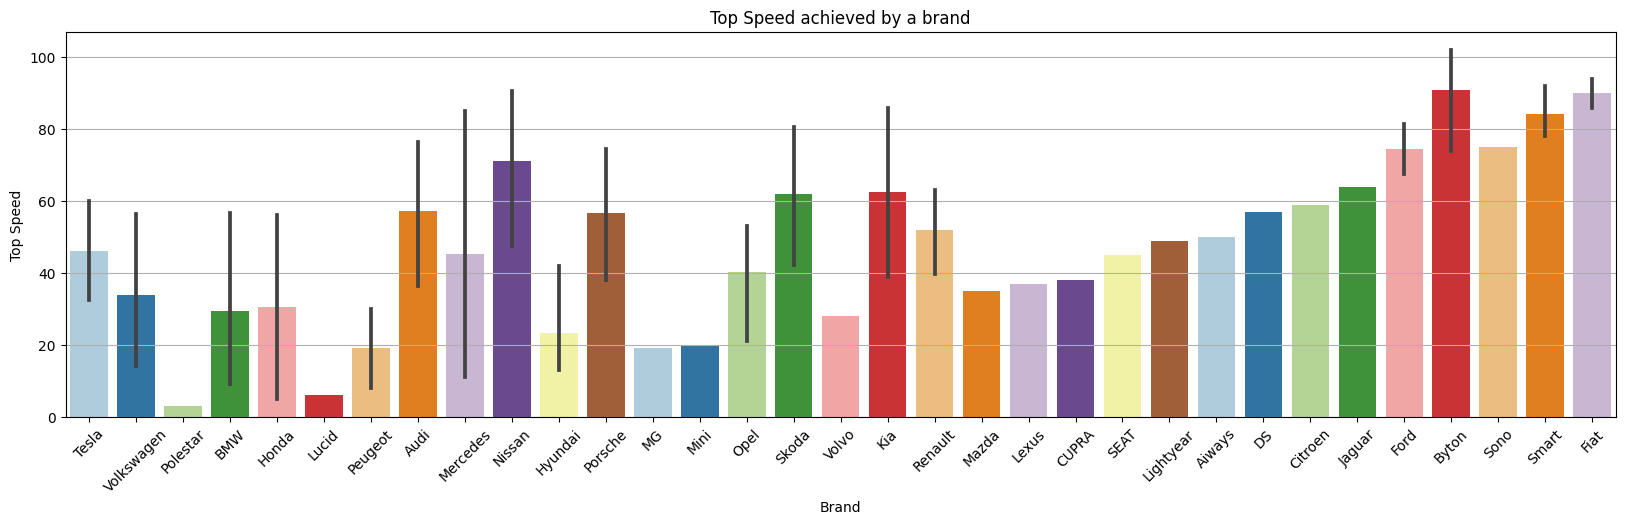

In [ ]:
import seaborn as sn
ax= plt.figure(figsize=(20,5))
sn.barplot(x='Brand',y=a,data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

**Range a car can achieve**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'Polestar'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Lucid'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Audi'),
  Text(8, 0, 'Mercedes'),
  Text(9, 0, 'Nissan'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Porsche'),
  Text(12, 0, 'MG'),
  Text(13, 0, 'Mini'),
  Text(14, 0, 'Opel'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Volvo'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Renault'),
  Text(19, 0, 'Mazda'),
  Text(20, 0, 'Lexus'),
  Text(21, 0, 'CUPRA'),
  Text(22, 0, 'SEAT'),
  Text(23, 0, 'Lightyear'),
  Text(24, 0, 'Aiways'),
  Text(25, 0, 'DS'),
  Text(26, 0, 'Citroen'),
  Text(27, 0, 'Jaguar'),
  Text(28, 0, 'Ford'),
  Text(29, 0, 'Byton'),
  Text(30, 0, 'Sono'),
  Text(31, 0, 'Smart'),
  Text(32, 0, 'Fiat')])

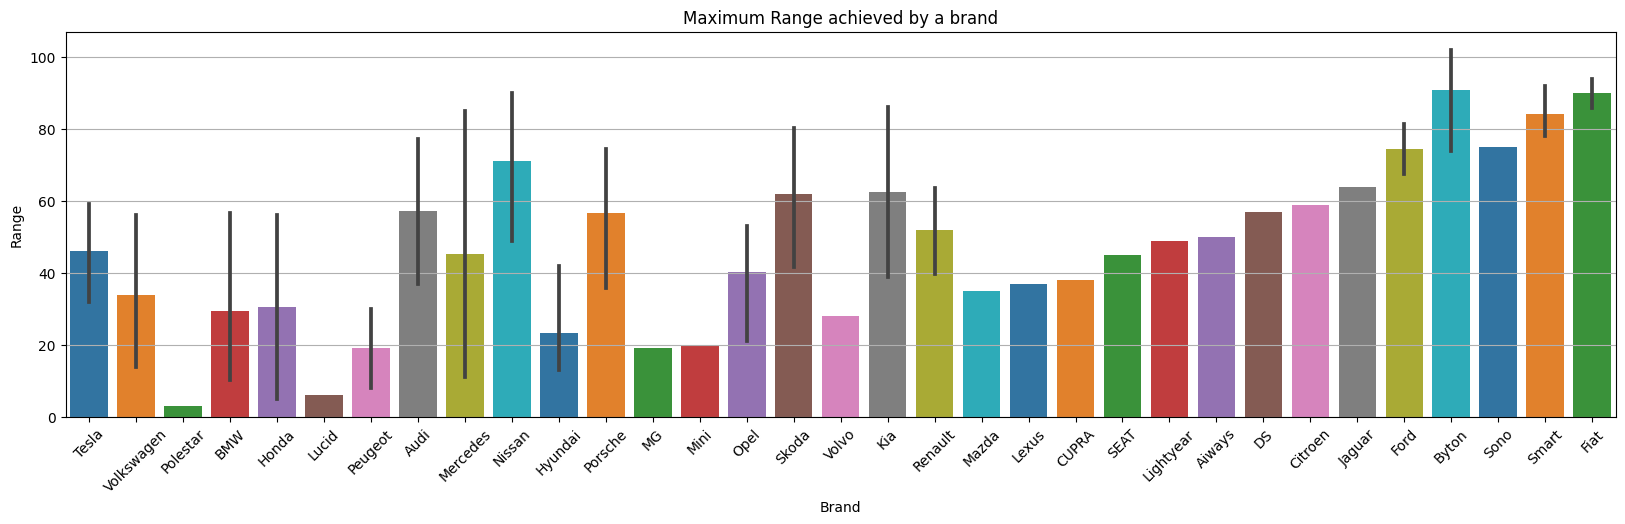

In [ ]:
ax= plt.figure(figsize=(20,5))
sn.barplot(x='Brand',y=a,data=df,palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)

**Efficiency of car**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'Polestar'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Lucid'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Audi'),
  Text(8, 0, 'Mercedes'),
  Text(9, 0, 'Nissan'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Porsche'),
  Text(12, 0, 'MG'),
  Text(13, 0, 'Mini'),
  Text(14, 0, 'Opel'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Volvo'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Renault'),
  Text(19, 0, 'Mazda'),
  Text(20, 0, 'Lexus'),
  Text(21, 0, 'CUPRA'),
  Text(22, 0, 'SEAT'),
  Text(23, 0, 'Lightyear'),
  Text(24, 0, 'Aiways'),
  Text(25, 0, 'DS'),
  Text(26, 0, 'Citroen'),
  Text(27, 0, 'Jaguar'),
  Text(28, 0, 'Ford'),
  Text(29, 0, 'Byton'),
  Text(30, 0, 'Sono'),
  Text(31, 0, 'Smart'),
  Text(32, 0, 'Fiat')])

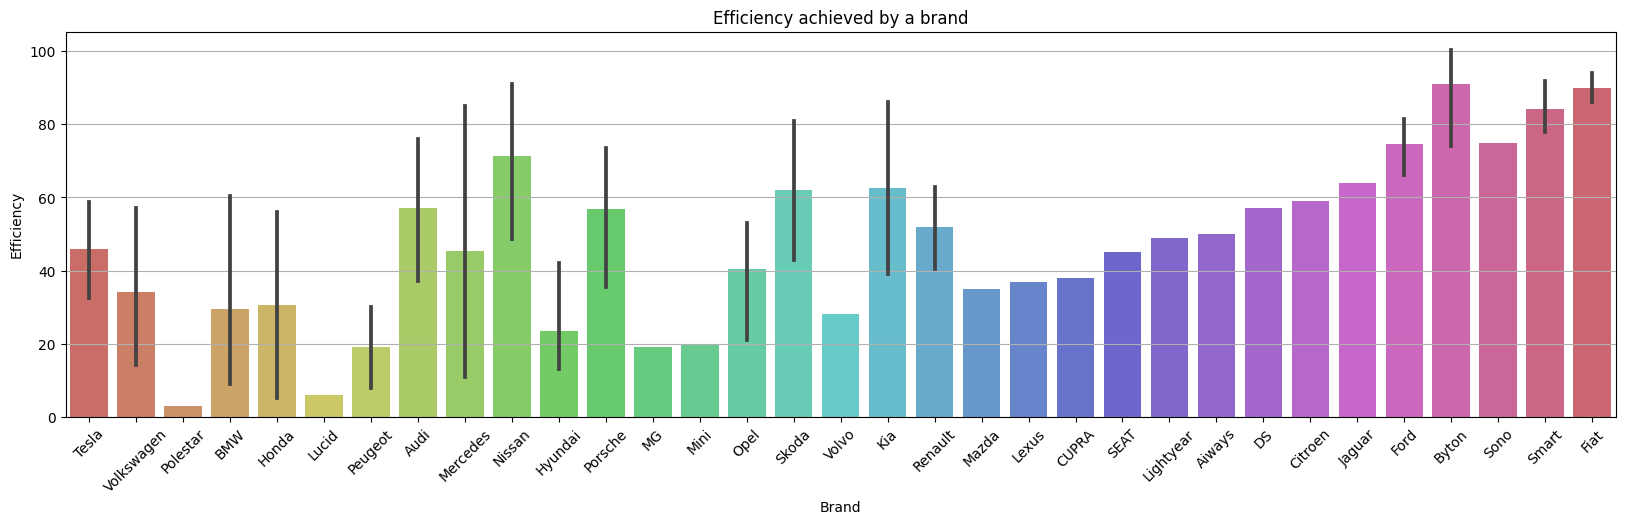

In [ ]:
ax= plt.figure(figsize=(20,5))
sn.barplot(x='Brand',y=a,data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

**Seats in each car**

Text(0.5, 1.0, 'Seats')

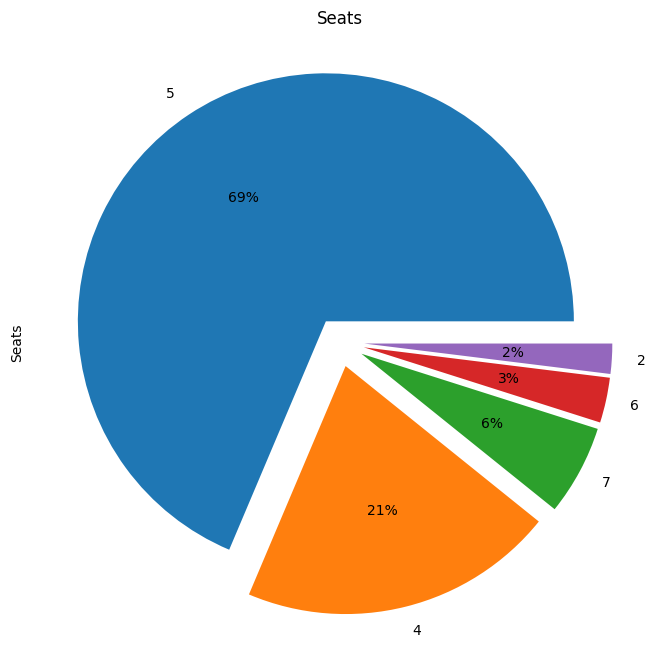

In [ ]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

**Type of plug used for charging**

Text(0.5, 1.0, 'Plug Type')

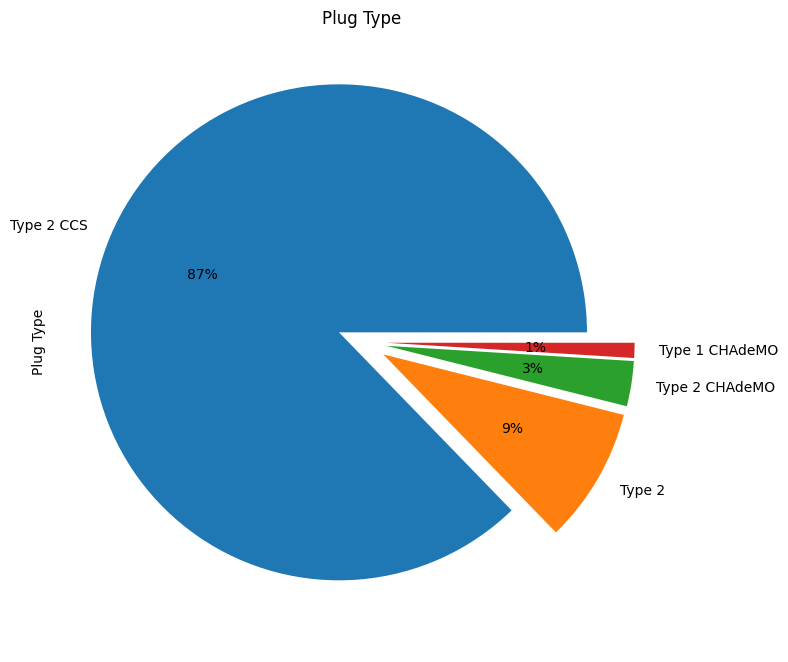

In [ ]:
df['Plug Type'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')


**Cars and their body styles**

Text(0.5, 1.0, 'Body Style')

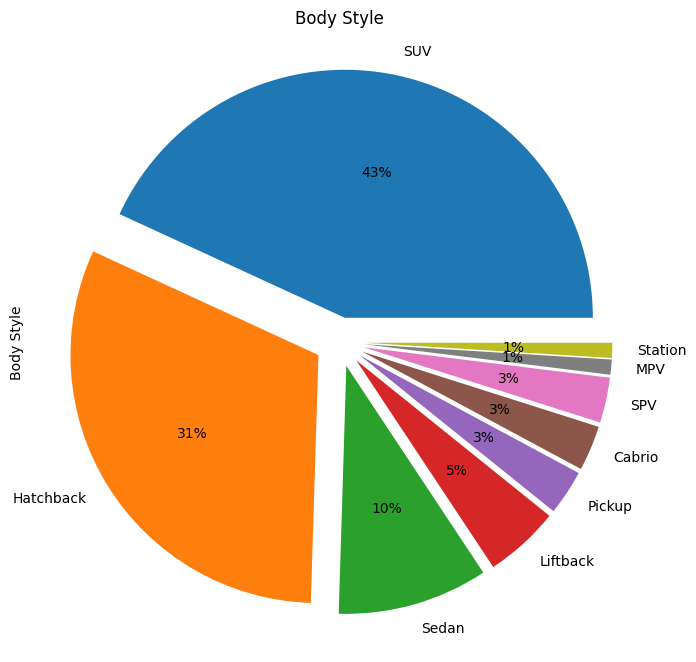

In [ ]:
df['Body Style'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

**Segment of car**

Text(0.5, 1.0, 'Segment')

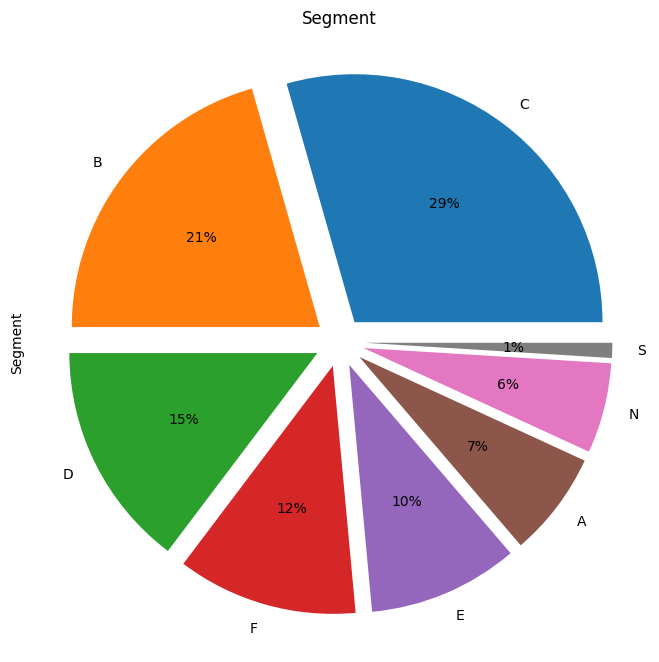

In [ ]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

**Heatmap to check correlation within data**

<ipython-input-18-31eac47c4c06>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


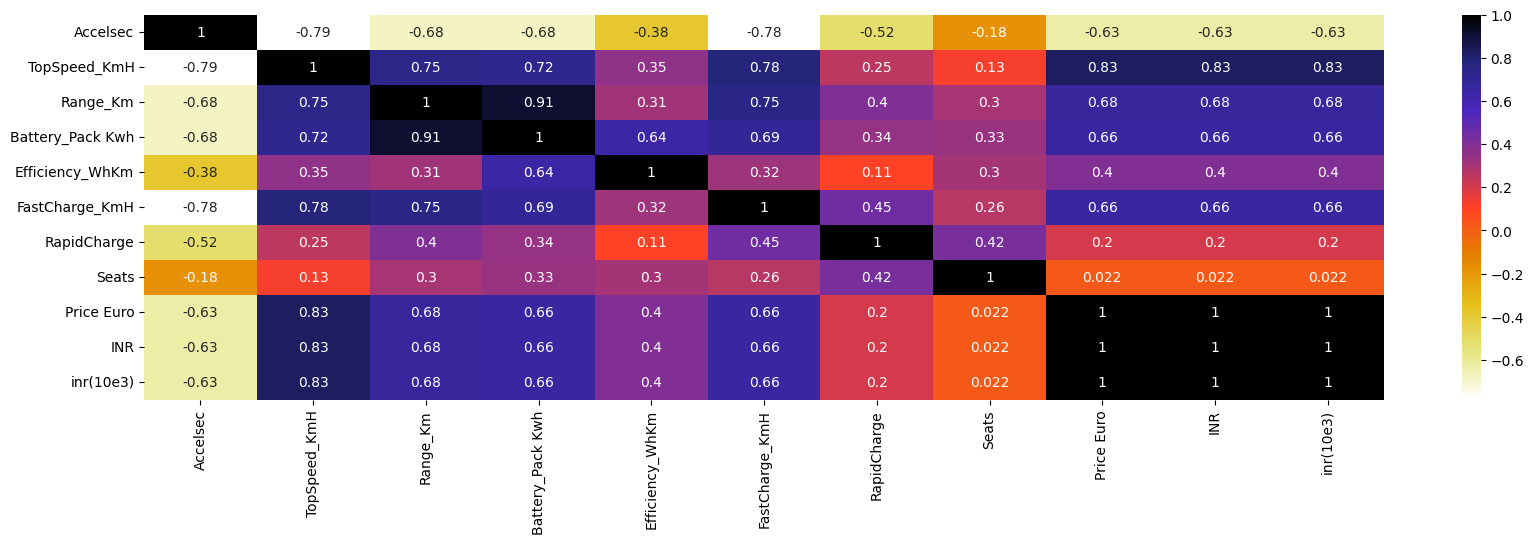

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,5))
cor = df.corr()
sns.heatmap(cor,annot = True,cmap = plt.cm.CMRmap_r)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


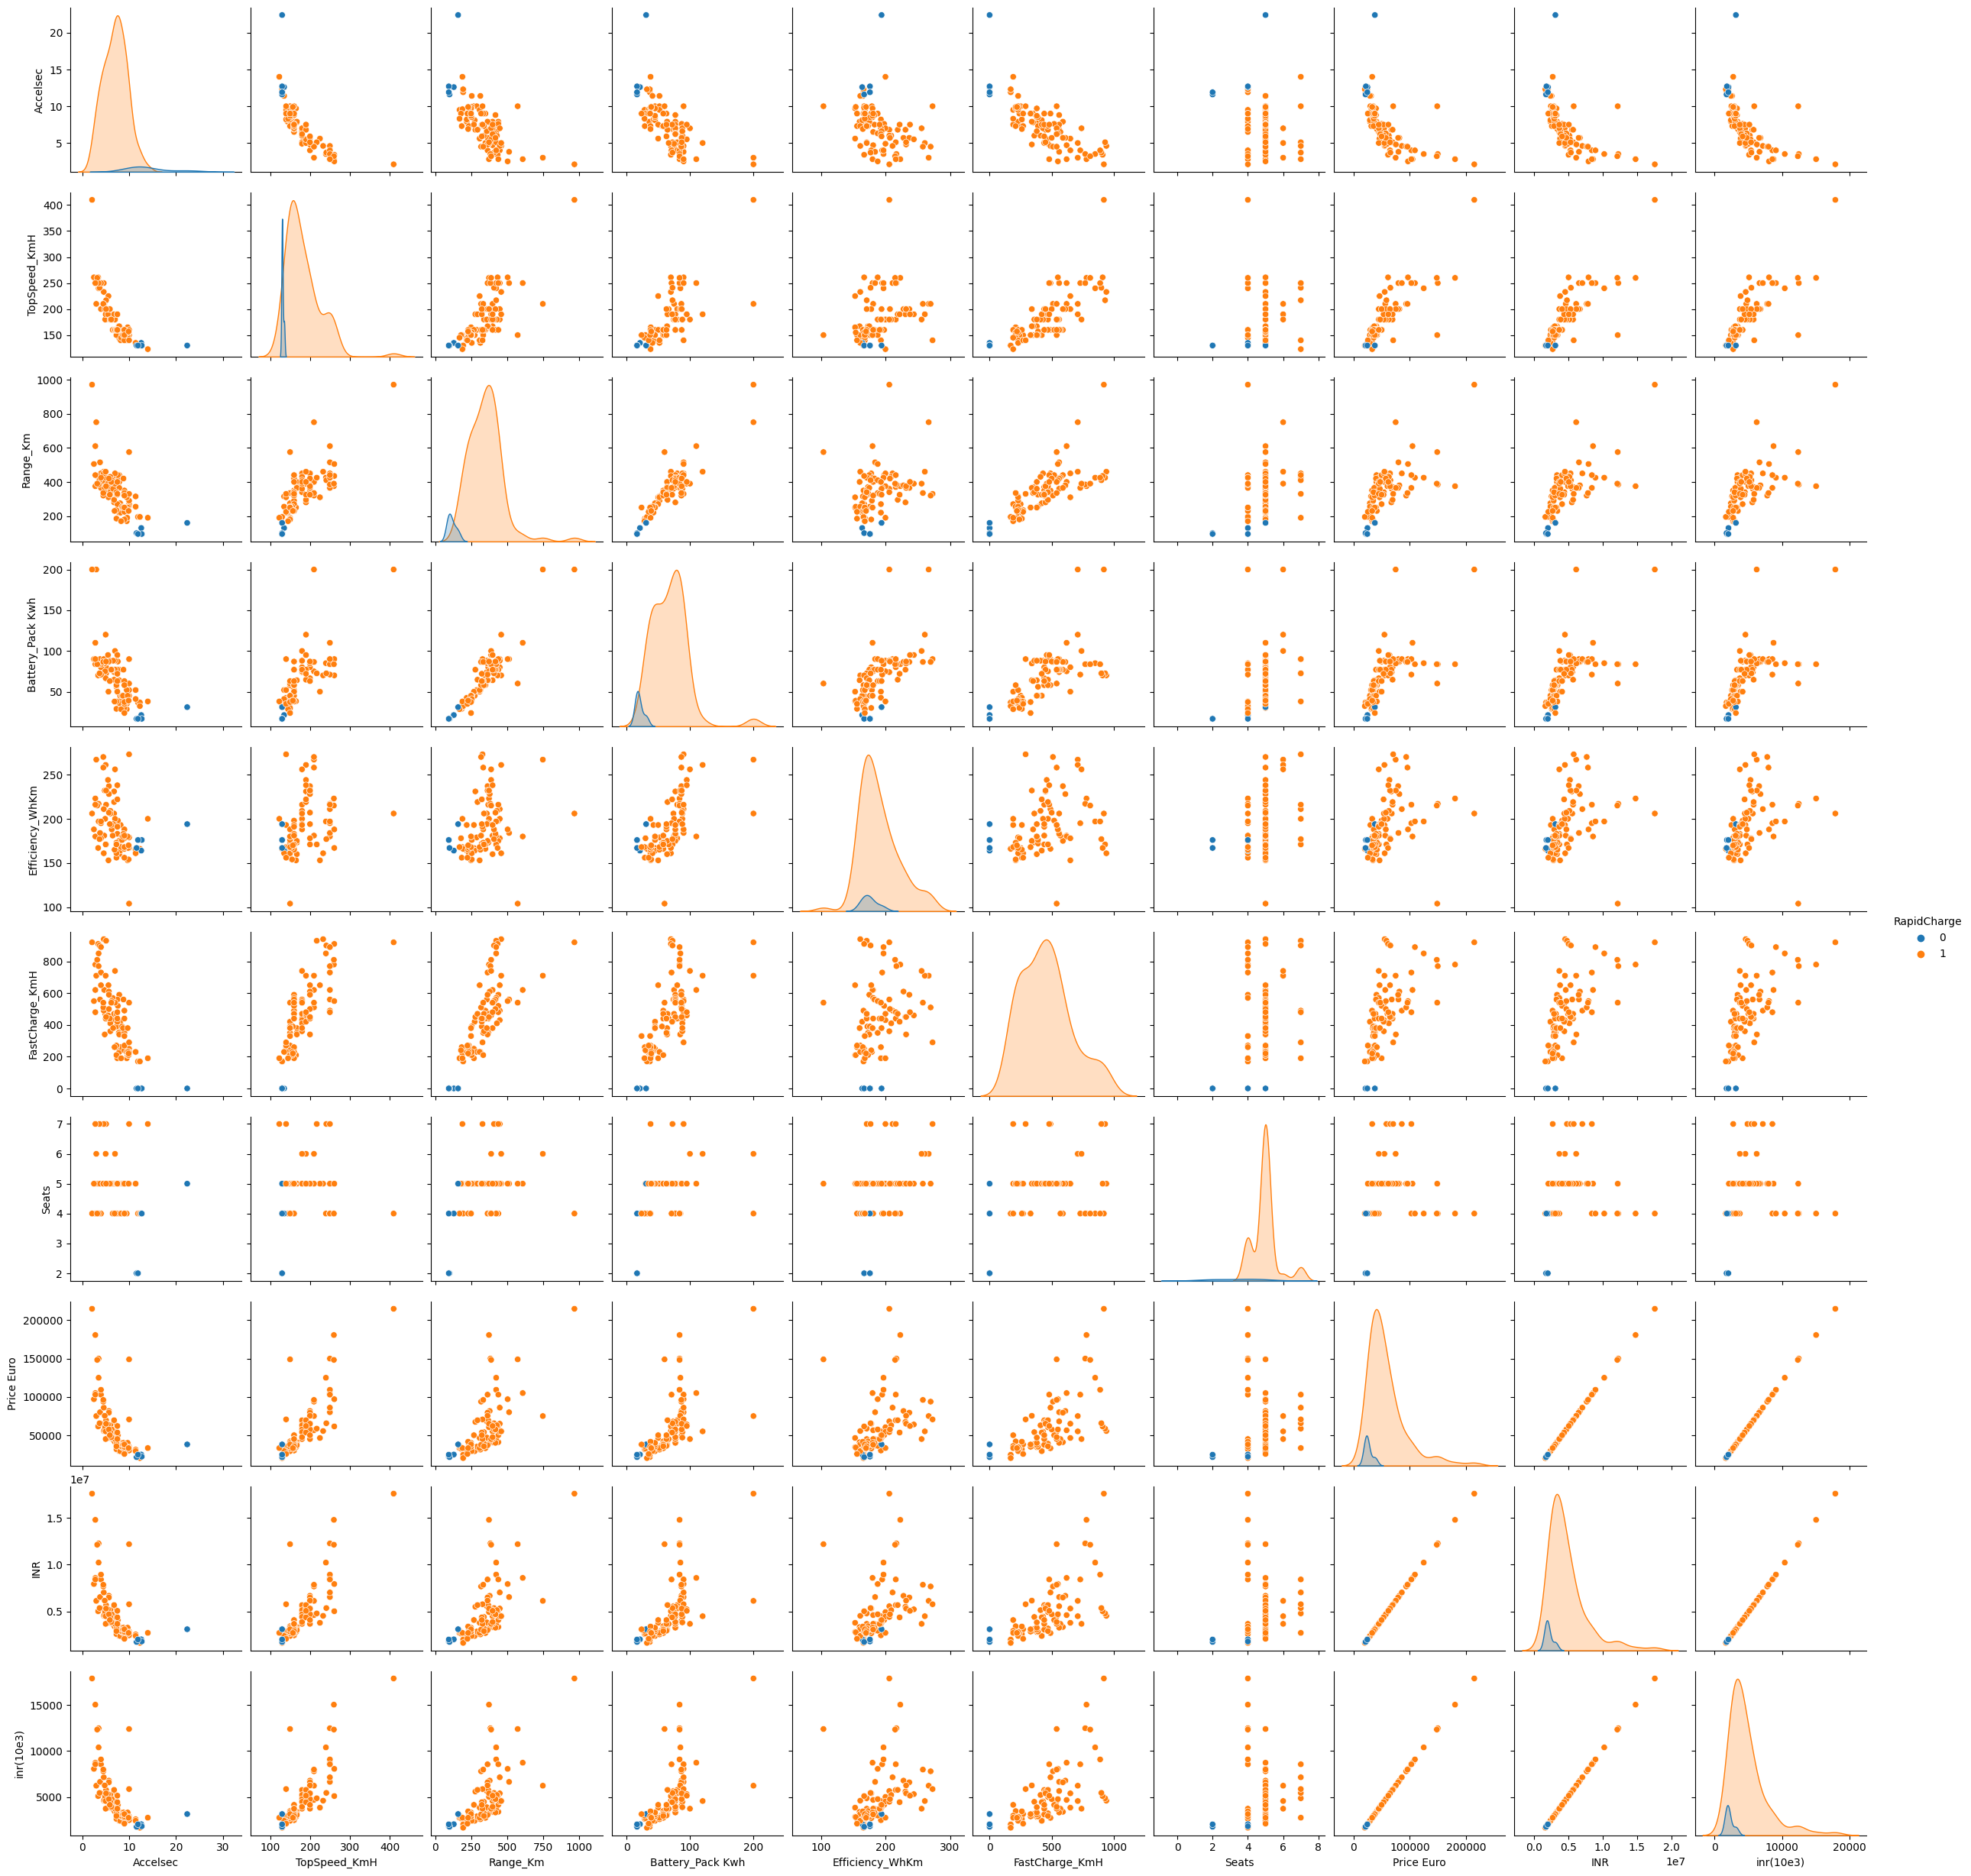

In [ ]:

sn.pairplot(df,hue='RapidCharge')

In [ ]:
df3= df[["TopSpeed_KmH", "inr(10e3)"]].groupby("TopSpeed_KmH").count()
df4= df[["Range_Km", "inr(10e3)"]].groupby("Range_Km").count()
df5= df[["Range_Km", "TopSpeed_KmH"]].groupby("Range_Km").count()
df5.head()

,TopSpeed_KmH
Range_Km,
95,2
100,1
130,1
160,1
170,2


In [ ]:
df3=df3.sort_values("TopSpeed_KmH",ascending = False).head(10)
df4=df4.sort_values("Range_Km",ascending = False).head(10)
df5=df5.sort_values("Range_Km",ascending = False).head(10)

Regression

In [ ]:
df['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
x=df[['Accelsec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=df['Price Euro']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred


array([ 3744.    ,  2496.    ,  5233.28  ,  3243.7184,  2043.808 ,
        5459.584 ,  5876.4992,  3328.    ,  4451.2   ,  2594.5088,
        2654.08  ,  3744.    ,  2041.2288, 15040.9792,  6609.824 ,
        3170.336 ,  3744.    ,  2866.9888,  3744.    , 17888.    ,
        4877.184 ,  5660.928 ,  3902.08  ,  2062.528 , 12396.8   ,
        8565.024 , 12338.6432,  3328.    ,  4695.808 ,  5408.    ,
        3064.8384,  3952.    ,  2826.3872, 10400.    ,  2745.6   ,
        2912.    ,  3153.28  ,  5028.3584,  2424.9472,  2766.0672,
        5604.1856])

**Finding R-square value**

In [ ]:
from sklearn.metrics import r2_score
r2=(r2_score(y_test,pred))
print(r2*100)

79.66245261701704


In [ ]:
y1=df[['RapidCharge']]
x1=df[['Price Euro']]

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

In [ ]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, pred1)
cm

array([[ 0,  2],
       [ 0, 19]])

In [ ]:
df

,Brand,Model,Accelsec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,Plug Type,Body Style,Segment,Seats,Price Euro,INR,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,1,2,Type 2 CCS,Sedan,D,5,55480,4540988.068,4615.9360
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,1,0,Type 2 CCS,Hatchback,C,5,30000,2455473.000,2496.0000
2,Polestar,2,4.7,210,400,75.0,181,620,1,2,Type 2 CCS,Liftback,D,5,56440,4619563.204,4695.8080
3,BMW,iX3,6.8,180,360,74.0,206,560,1,0,Type 2 CCS,SUV,D,5,68040,5569012.764,5660.9280
4,Honda,e,9.5,145,170,28.5,168,190,1,0,Type 2 CCS,Hatchback,B,4,32997,2700774.753,2745.3504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Nissan,Ariya 63kWh,7.5,160,330,63.0,191,440,1,1,Type 2 CCS,Hatchback,C,5,45000,3683209.500,3744.0000
98,Audi,e-tron S Sportback 55 quattro,4.5,210,335,86.5,258,540,1,2,Type 2 CCS,SUV,E,5,96050,7861606.055,7991.3600
99,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,63.0,194,440,1,2,Type 2 CCS,Hatchback,C,5,50000,4092455.000,4160.0000
100,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,87.0,232,450,1,2,Type 2 CCS,Hatchback,C,5,65000,5320191.500,5408.0000


<Axes: xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

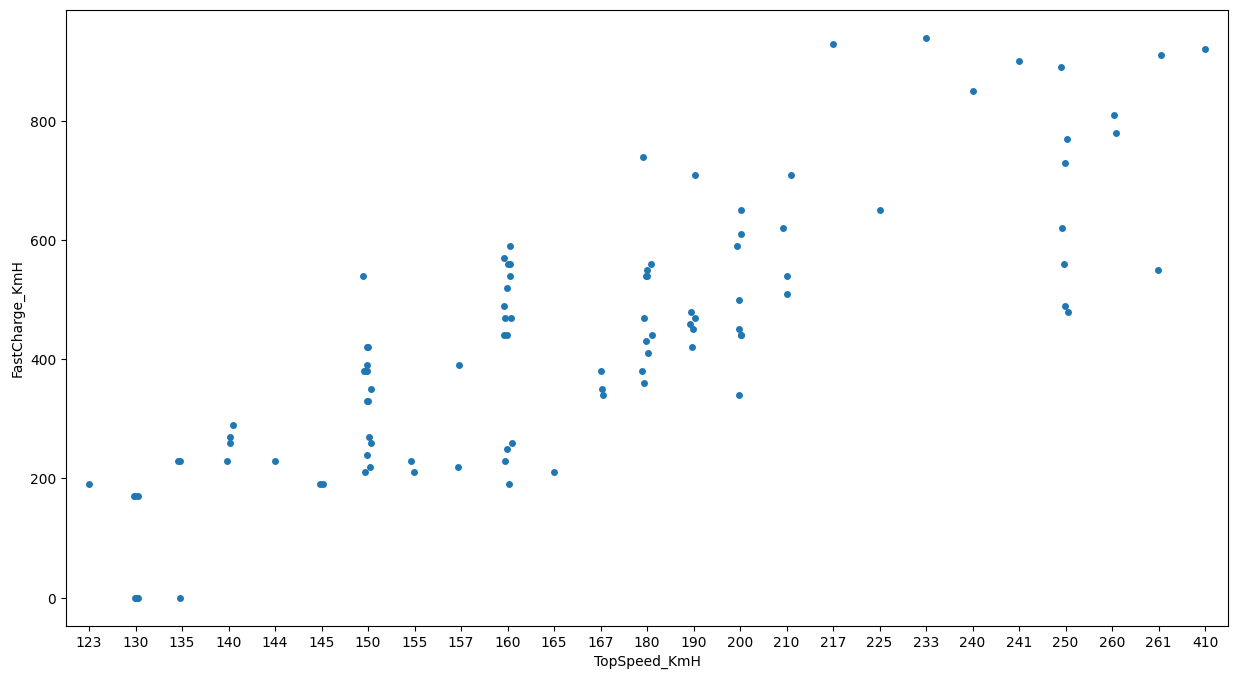

In [ ]:
ax=plt.subplots(figsize=(15,8))
sn.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=df, jitter=True)

<Axes: xlabel='TopSpeed_KmH', ylabel='Efficiency_WhKm'>

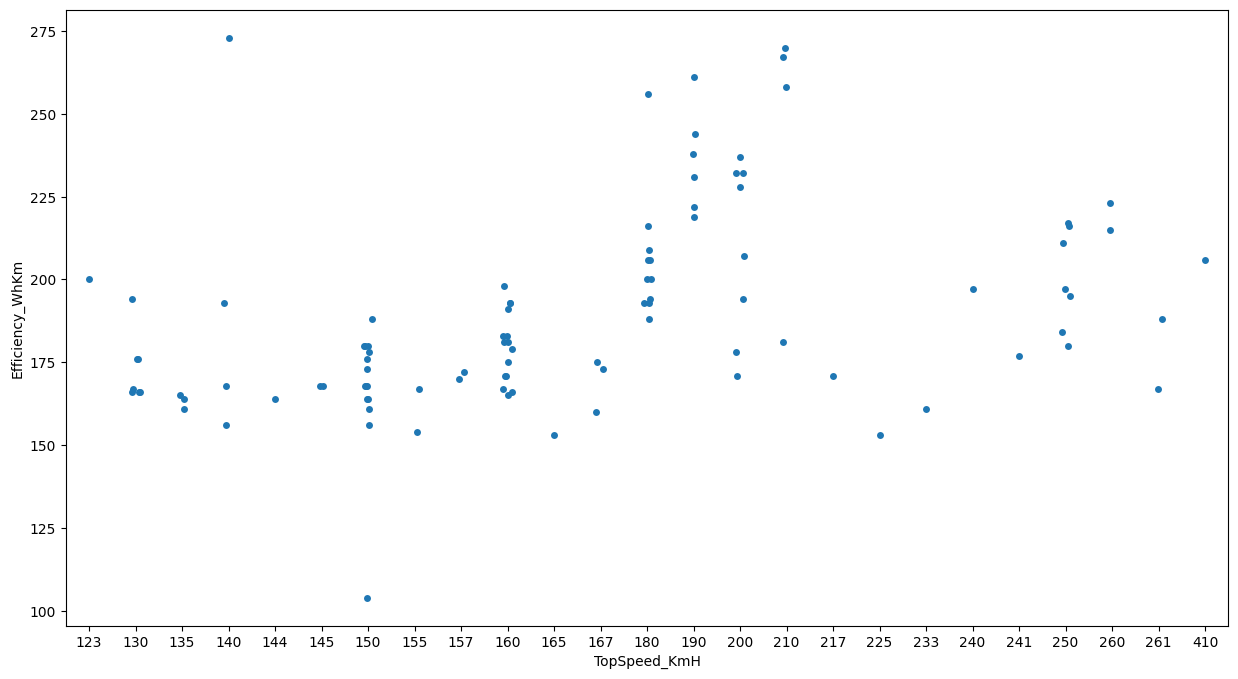

In [ ]:
ax=plt.subplots(figsize=(15,8))
sn.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=df, jitter=True)

In [ ]:
features = ['Accelsec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'inr(10e3)','PowerTrain']
# Separating out the features
from sklearn.preprocessing import StandardScaler
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data2

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.342036,0.254881,-1.297001,-0.569622,0.770965,-1.304321,0.401787,-0.762618,-0.354884
1,-1.914561,-0.569047,-0.709043,0.593886,0.206999,0.352992,-0.397134,0.238896,-0.325262
2,1.515695,0.024369,-0.382073,-0.679665,0.107532,-0.729073,0.266925,0.042262,-0.087392
3,0.252431,-0.104398,-0.257001,1.601049,-0.142045,0.190743,-0.412853,-0.301661,0.185571
4,-2.561396,0.254023,-0.791450,0.322643,-0.893104,0.348270,-0.495068,0.109750,-0.165978
...,...,...,...,...,...,...,...,...,...
97,-0.305650,-0.460376,-0.075838,0.164252,-0.163668,-0.041783,0.151686,-0.126566,0.132994
98,2.231842,0.177451,1.792758,0.158852,-1.120332,0.077190,-0.342025,-0.091941,0.101495
99,0.739027,-0.181728,0.277008,-0.811593,-0.287049,-0.448344,0.056445,0.286306,-0.265459
100,1.476350,-0.129236,1.151317,-0.179274,-0.719638,-0.118880,0.269224,0.310137,-0.101881


In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)

array([ 53.78,  68.  ,  78.72,  84.98,  90.83,  94.23,  96.8 ,  98.94,
       100.  ])

In [ ]:
df_9=data2.iloc[:,:9]
df_9.head(3)

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.342036,0.254881,-1.297001,-0.569622,0.770965,-1.304321,0.401787,-0.762618,-0.354884
1,-1.914561,-0.569047,-0.709043,0.593886,0.206999,0.352992,-0.397134,0.238896,-0.325262
2,1.515695,0.024369,-0.382073,-0.679665,0.107532,-0.729073,0.266925,0.042262,-0.087392


In [ ]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
PC1,-0.397320,-0.031950,0.178931,-0.083814,0.350022,0.476277,0.041764,-0.479310,-0.470358
PC2,0.405394,0.265108,-0.045449,0.033695,0.161271,-0.122599,-0.347157,0.293139,-0.717416
PC3,0.231068,-0.090687,0.746182,0.414735,-0.412281,0.077055,0.115080,-0.073804,-0.122423
PC4,0.399331,0.020272,-0.208469,0.176711,0.091676,-0.396197,0.036353,-0.773727,0.009225
Pc5,0.232698,-0.533669,-0.434614,-0.094237,-0.500394,0.395700,-0.063030,-0.065794,-0.219099
PC6,0.385625,0.017360,-0.154445,0.233263,0.376797,0.317978,0.696640,0.209205,0.023803
PC7,0.157940,-0.716899,0.222544,0.039317,0.522069,-0.098320,-0.309081,0.111116,0.141206
PC8,0.371545,0.347405,0.073630,-0.054762,0.084277,0.564784,-0.459314,-0.127231,0.423796
PC9,0.314783,-0.018007,0.313020,-0.848982,-0.032663,-0.094250,0.259599,-0.060012,-0.029859


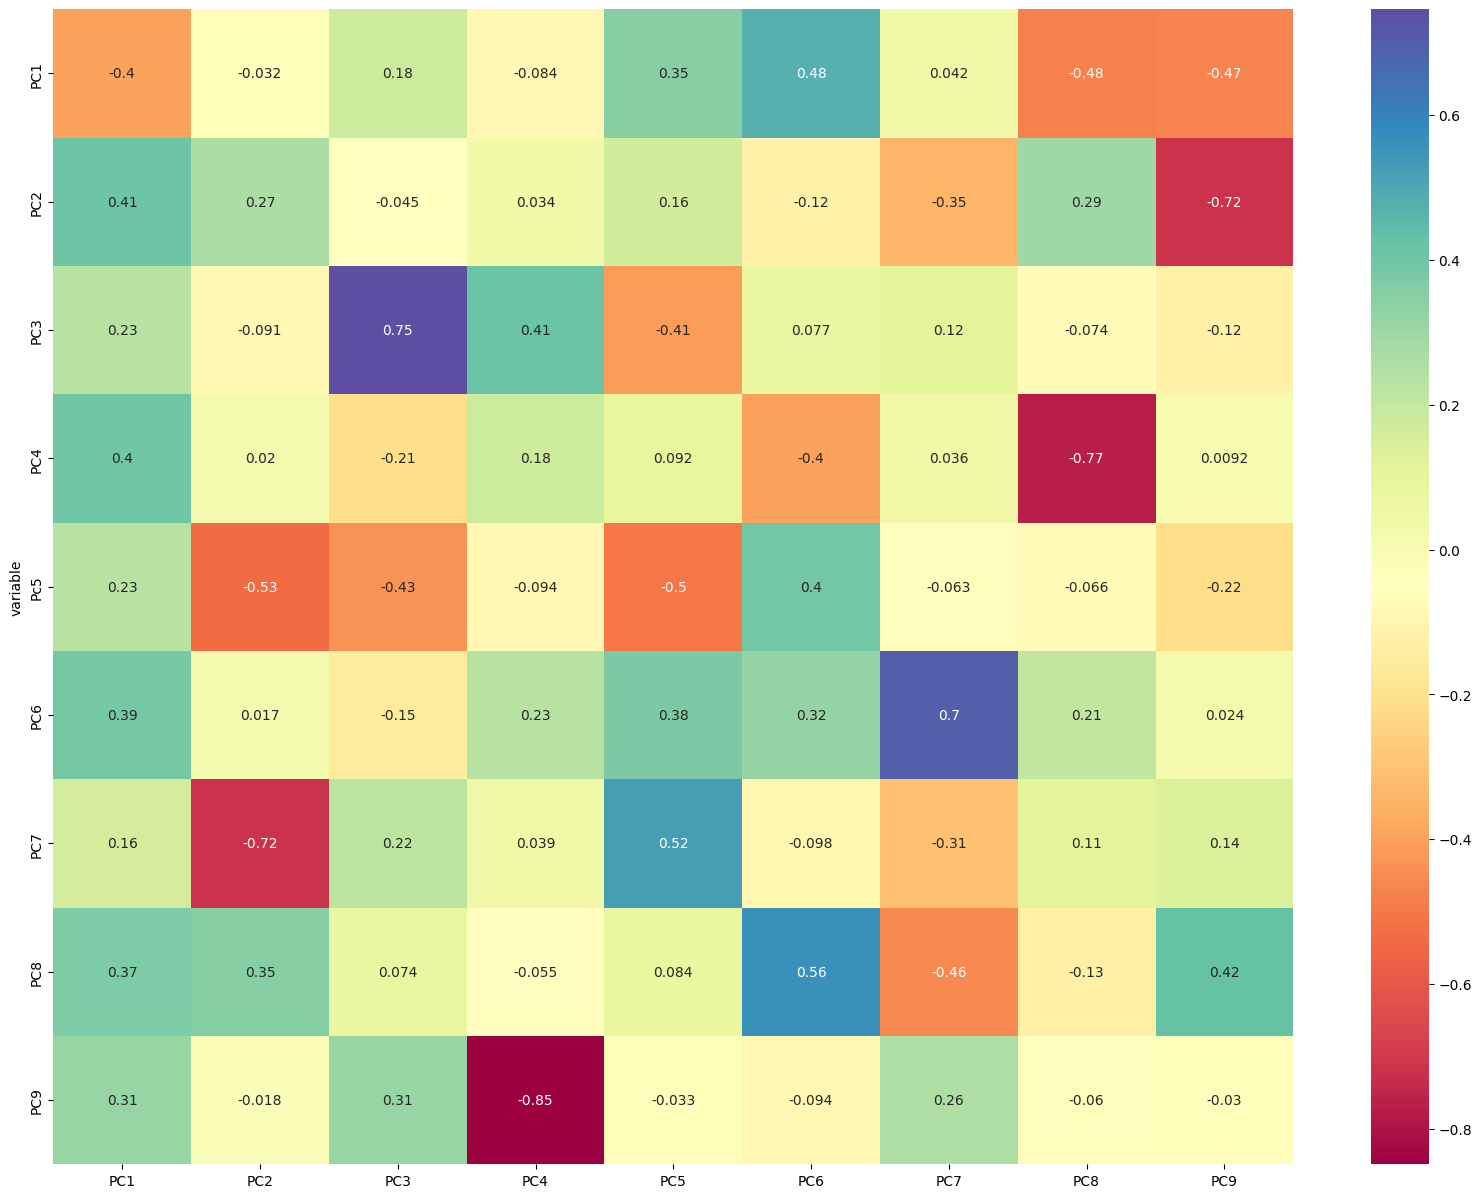

In [ ]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sn.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()


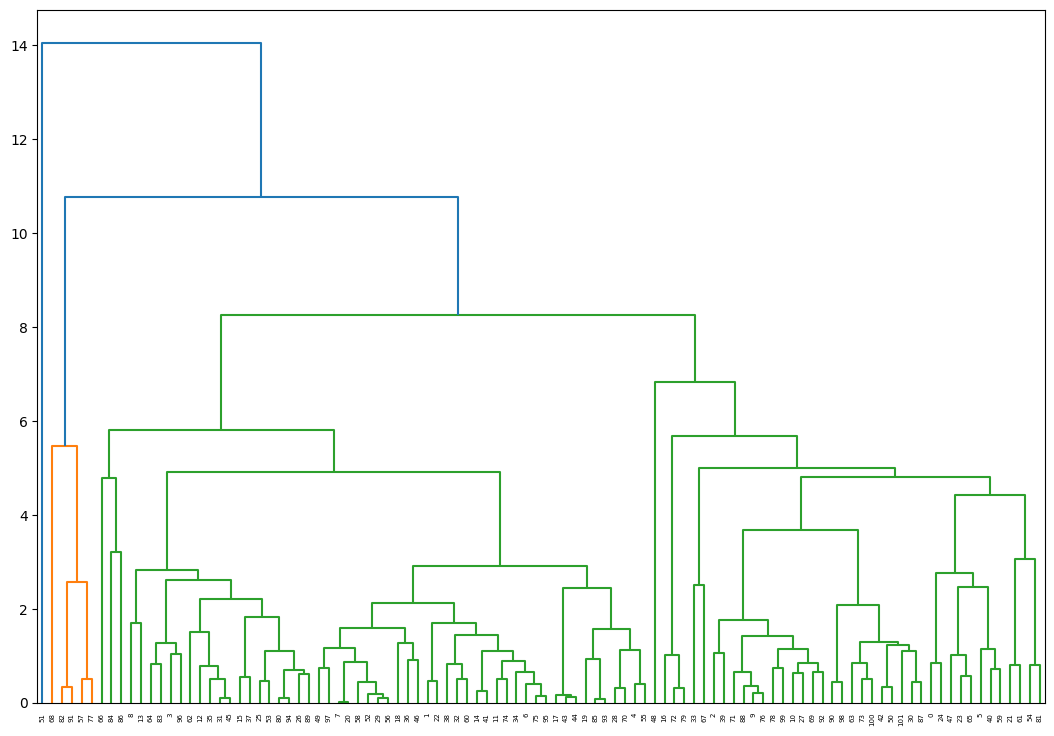

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()


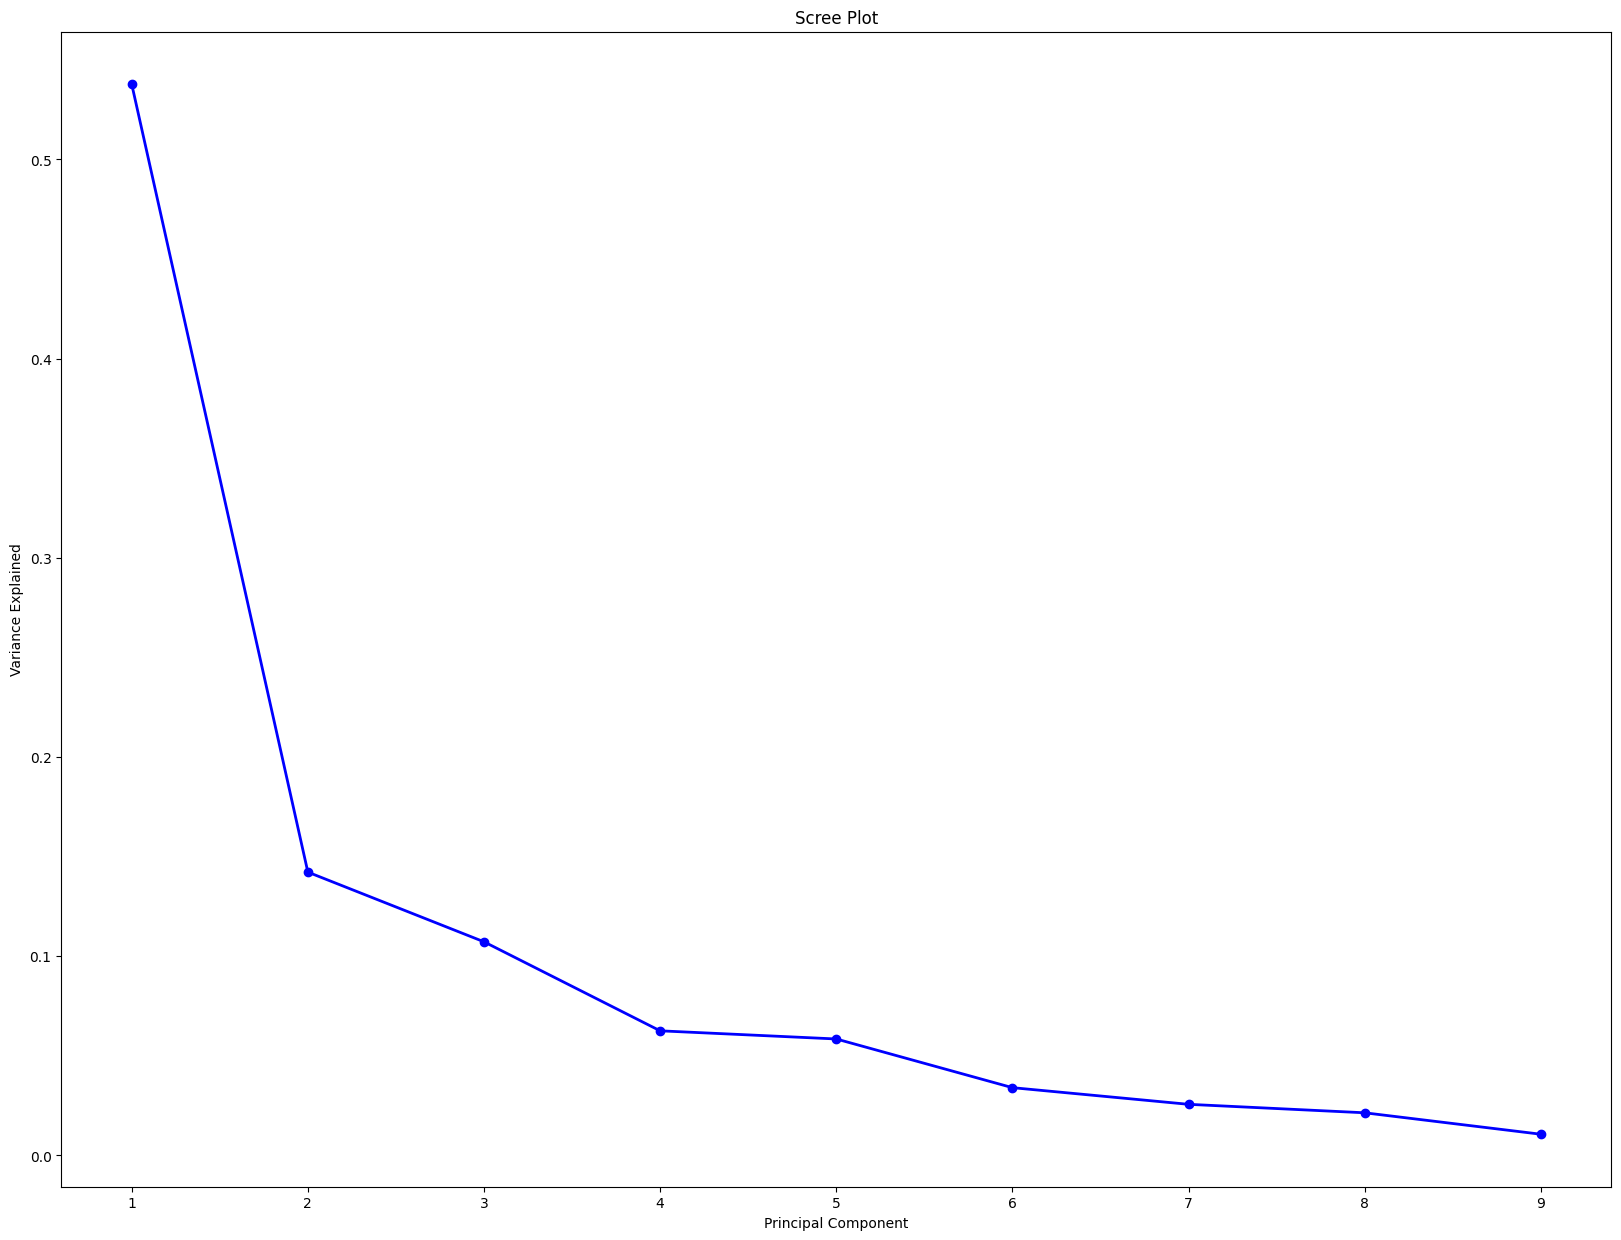

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

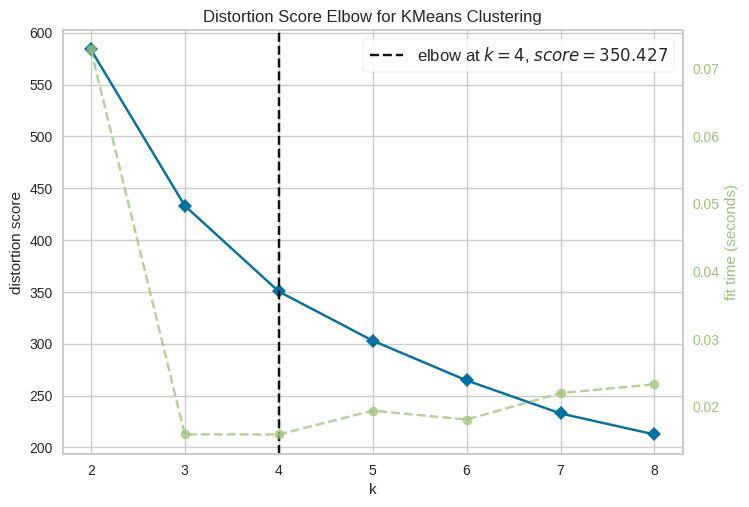

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

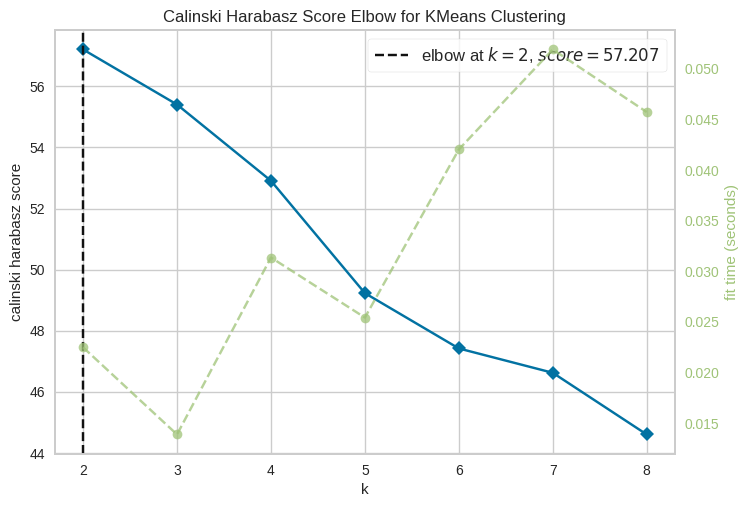

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[3 0 1 0 0 3 0 0 0 1 1 0 0 0 0 0 3 0 0 0 0 1 0 3 3 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 3 0 1 0 0 0 0 3 3 0 1 3 0 0 1 0 0 2 0 3 0 1 0 1 0 3 0 1 2 1 0 1 3 1
 0 0 1 2 1 3 0 1 2 0 1 0 1 1 1 0 1 2 1 0 0 0 0 0 1 1 1 1]
350.42727386774413
5
[[-1.17713636e+00 -3.61061710e-01 -4.97293199e-01  1.52024268e-01
  -9.90815172e-02  1.23366178e-01 -4.25958898e-02  1.53024383e-02
  -2.91647221e-02]
 [ 1.53857250e+00 -4.87147645e-01  8.38904255e-01 -1.49374283e-01
  -1.19973613e-01 -2.01792533e-01  1.54651343e-01  4.26746932e-02
   3.68164416e-02]
 [-4.96071318e+00  3.00886242e+00  1.84767463e+00  2.33687384e-01
   1.15965673e+00 -5.33637458e-01  6.41036687e-02  5.58254396e-02
   9.24342788e-02]
 [ 3.24705804e+00  1.46672689e+00 -5.80897543e-01 -3.76655298e-01
   2.42409744e-01  1.58476129e-01 -2.04606200e-01 -1.83515359e-01
   6.33103758e-04]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


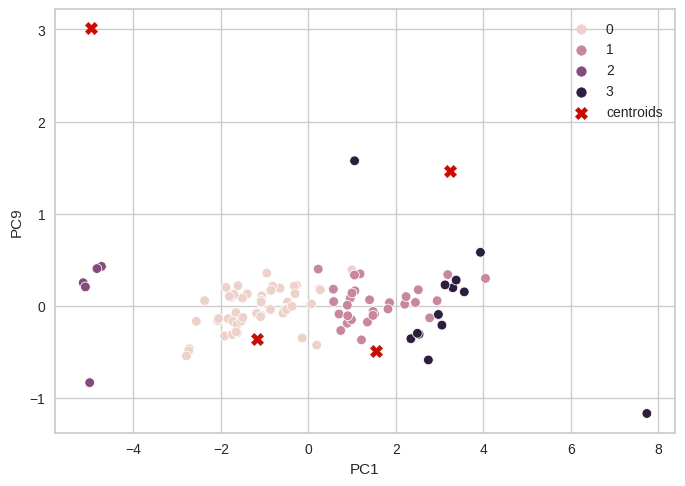

In [ ]:
#Visulazing clusters
sn.scatterplot(data=data2, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()